In [ ]:
""" We are trying to display images with only one band """

from osgeo import gdal

# Opening the GeoTIFF file
file_path = r"C:\Users\.....tif"  #Replace here with your file location
dataset = gdal.Open(file_path)

# Extracting the band
band = dataset.GetRasterBand(1)

# Getting the minimum and maximum values
min_val = band.GetMinimum()
max_val = band.GetMaximum()

# If the minimum and maximum values are not set, compute them
if min_val is None or max_val is None:
    (min_val, max_val) = band.ComputeRasterMinMax(1)

print(f"Minimum value: {min_val}")
print(f"Maximum value: {max_val}")



########## It is important to know the min and max value to display the bands within the right range ###############

Minimum value: 28.0
Maximum value: 255.0


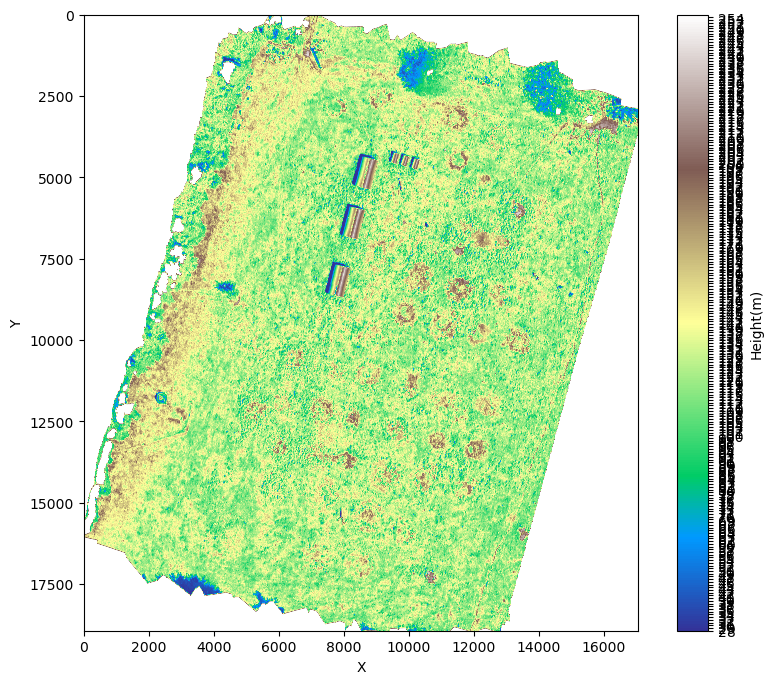

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker



# Extracting the band
band_1 = dataset.GetRasterBand(1).ReadAsArray().astype(np.float32) 


# Displaying the band with colormap and index
plt.figure(figsize=(10, 8))
img = plt.imshow(band_1, cmap='terrain', vmin=min_val, vmax=max_val)
cbar = plt.colorbar(img, label='Height(m)')

# Setting colorbar ticks from min to max with a gap of 1 ( Change based on your need !!)
##cbar.set_ticks(np.arange(min_val, max_val, 1))

plt.axis('on')  # Turns off/on the axis
plt.xlabel('X')
plt.ylabel('Y')


plt.show()


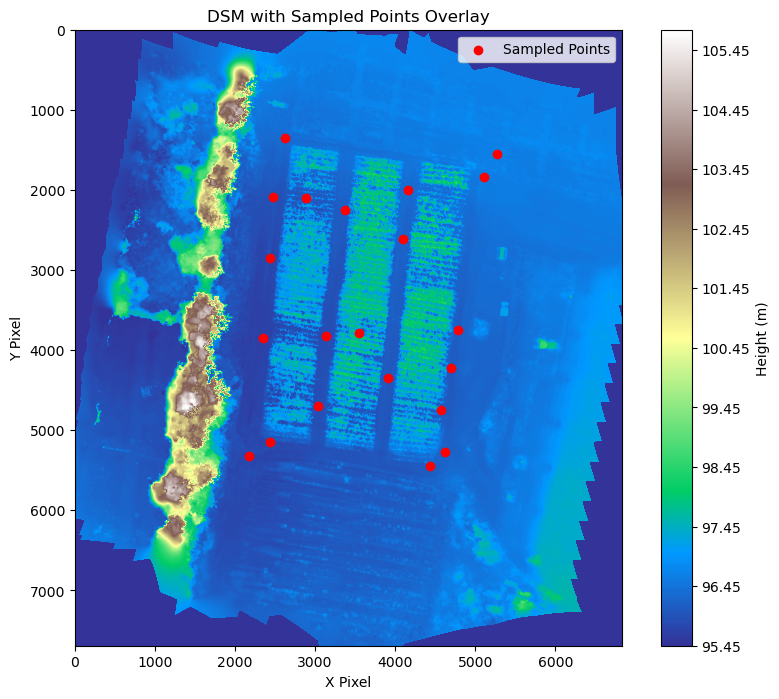

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

# File paths
raster_path = r'C:\.............tif'
points_path = r'C:\..............gpkg'

# Open raster dataset
dataset = gdal.Open(raster_path)
band = dataset.GetRasterBand(1)

# Get min and max values
min_val = band.GetMinimum()
max_val = band.GetMaximum()
if min_val is None or max_val is None:
    min_val, max_val = band.ComputeRasterMinMax(1)

# Read raster as array
band_1 = band.ReadAsArray().astype(np.float32)

# Get raster geotransform (needed for coordinate transformation)
transform = dataset.GetGeoTransform()

# Read point shapefile
gdf = gpd.read_file(points_path)

# Function to convert geographical coordinates to pixel coordinates
def world_to_pixel(transform, x, y):
    """
    Convert world (geographic) coordinates to pixel (row, col) indices.
    """
    pixel_x = int((x - transform[0]) / transform[1])
    pixel_y = int((y - transform[3]) / transform[5])  # Negative because Y resolution is negative
    return pixel_x, pixel_y

# Convert all point geometries
pixel_coords = [world_to_pixel(transform, point.x, point.y) for point in gdf.geometry]

# Extract pixel X and Y coordinates
pixel_xs, pixel_ys = zip(*pixel_coords)

# Plot raster
plt.figure(figsize=(10, 8))
img = plt.imshow(band_1, cmap='terrain', vmin=min_val, vmax=max_val)
cbar = plt.colorbar(img, label='Height (m)')
cbar.set_ticks(np.arange(min_val, max_val, 1))

# Overlay points in red (after converting to pixel coordinates)
plt.scatter(pixel_xs, pixel_ys, color='red', marker='o', label='Sampled Points')
plt.legend()

plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.title('DSM with Sampled Points Overlay')
plt.show()


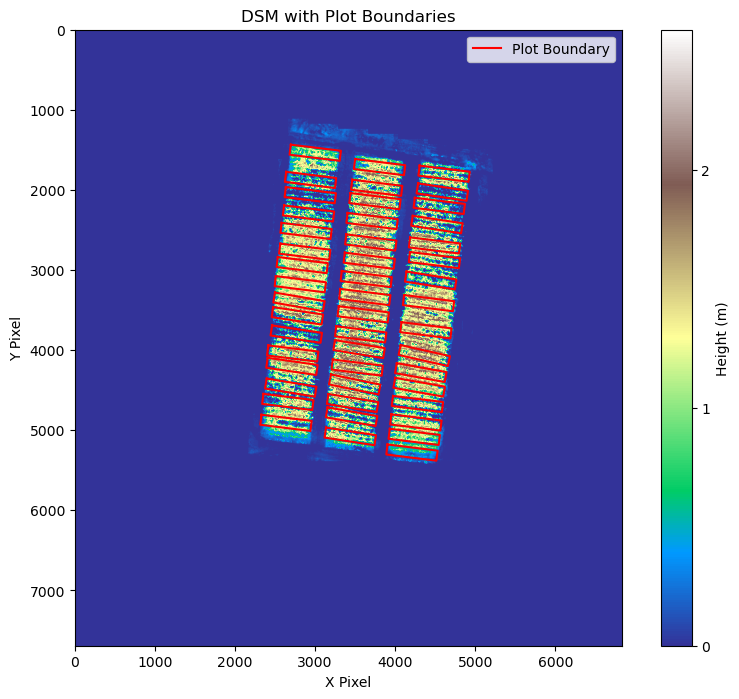

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

# File paths
raster_path = r"C:\..............dat"
polygon_path = r"c:\Users.......shp"

# Open raster dataset
dataset = gdal.Open(raster_path)
band = dataset.GetRasterBand(1)

# Get min and max values
min_val = band.GetMinimum()
max_val = band.GetMaximum()
if min_val is None or max_val is None:
    min_val, max_val = band.ComputeRasterMinMax(1)

# Read raster as array
band_1 = band.ReadAsArray().astype(np.float32)

# Get raster geotransform (needed for coordinate transformation)
transform = dataset.GetGeoTransform()

# Read polygon shapefile
gdf = gpd.read_file(polygon_path)

# Function to convert geographical coordinates to pixel coordinates
def world_to_pixel(transform, x, y):
    """Convert world (geographic) coordinates to pixel (row, col) indices."""
    pixel_x = int((x - transform[0]) / transform[1])
    pixel_y = int((y - transform[3]) / transform[5])  # Negative because Y resolution is negative
    return pixel_x, pixel_y

# Plot raster
plt.figure(figsize=(10, 8))
img = plt.imshow(band_1, cmap='terrain', vmin=min_val, vmax=max_val)
cbar = plt.colorbar(img, label='Height (m)')
cbar.set_ticks(np.arange(min_val, max_val, 1))

# Convert and plot polygon boundaries
first_polygon = True  # Track the first polygon for legend labeling
for _, row in gdf.iterrows():
    if row.geometry.geom_type in ["Polygon", "MultiPolygon"]:
        exterior_coords = row.geometry.exterior.coords.xy
        pixel_coords = [world_to_pixel(transform, x, y) for x, y in zip(*exterior_coords)]
        pixel_xs, pixel_ys = zip(*pixel_coords)
        
        # Only label the first polygon for the legend
        if first_polygon:
            plt.plot(pixel_xs, pixel_ys, color='red', linewidth=1.5, label='Plot Boundary')
            first_polygon = False
        else:
            plt.plot(pixel_xs, pixel_ys, color='red', linewidth=1.5)

plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.title('DSM with Plot Boundaries')
plt.legend()  # Now legend should work correctly
plt.show()
